In [5]:
from selenium.webdriver import Chrome
import time
from selenium.common.exceptions import ElementNotVisibleException
#from konlpy.tag import Twitter
from ckonlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
import numpy
import operator
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
tagger=Twitter()

In [6]:
def get_noun(text):
    nouns = tagger.nouns(text)
    return [n for n in nouns if len(n) > 1]
cv=CountVectorizer(tokenizer=get_noun,max_features=300)
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=1000, height=1000)
tagger.add_dictionary('가담항설','Noun')

In [3]:
def get_comment():
    browser=Chrome()
    browser.get('http://comic.naver.com')
    time.sleep(3)
    query=browser.find_element_by_css_selector('.snb_search_text')
    query.click()
    name=input('무슨 웹툰을 찾고 싶니?: ')+'\n'
    query.send_keys(name)
    browser.get(browser.find_elements_by_css_selector('h5 a')[0].get_attribute('href'))
    episodes=[]
    i=1
    for ep in browser.find_elements_by_css_selector('td.title a'):
        print('('+str(i)+') '+ep.text)
        link=ep.get_attribute('href')
        print(link)
        episodes.append(link)
        i=i+1
    number=int(input('몇번째 웹툰 볼래?: '))
    browser.get(episodes[(number-1)].replace('http://','http://m.'))
    time.sleep(3)
    browser.find_element_by_css_selector('a.u_cbox_btn_view_comment').click()
    print('댓글을 모으는 중이야. 조금 오래 걸려.')
    time.sleep(2)
    while(True):
        try:
            browser.find_element_by_css_selector('span.u_cbox_page_more').click()
            time.sleep(1)
        except ElementNotVisibleException:
            break
    time.sleep(2)
    cmt=[]
    for comment in browser.find_elements_by_css_selector('div.u_cbox_text_wrap'):
        cmt.append(comment.text)
    time.sleep(1)
    print('이제 wordcloud를 그려줄게.')
    tdm=cv.fit_transform(cmt)
    words=cv.get_feature_names()
    count_mat=tdm.sum(axis=0)
    count=numpy.squeeze(numpy.asarray(count_mat))
    word_count=list(zip(words,count))
    word_count=sorted(word_count,key=operator.itemgetter(1),reverse=True)
    cloud = wc.fit_words(dict(word_count))
    
    pyplot.figure(figsize=(12, 9))
    pyplot.imshow(cloud)
    pyplot.axis("off")
    pyplot.show()
    
    return cmt

무슨 웹툰을 찾고 싶니?: 가담항설
(1) 90화
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=93&weekday=thu
(2) 89화
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=92&weekday=thu
(3) 특별편(3)
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=91&weekday=thu
(4) 특별편(2)
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=90&weekday=thu
(5) 특별편(1)
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=89&weekday=thu
(6) 88화
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=88&weekday=thu
(7) 87화
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=87&weekday=thu
(8) 86화
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=86&weekday=thu
(9) 85화
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=85&weekday=thu
(10) 84화
http://comic.naver.com/webtoon/detail.nhn?titleId=670144&no=84&weekday=thu
몇번째 웹툰 볼래?: 1
댓글을 모으는 중이야. 조금 오래 걸려.
이제 wordcloud를 그려줄게.


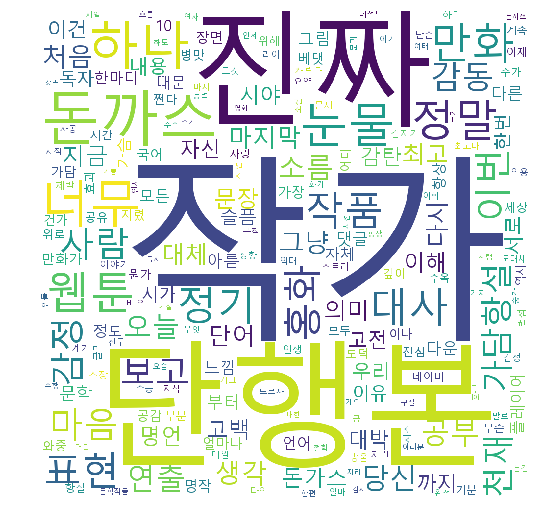

['시야 흐릿하다가 톡 맑아지는 표현 살면서 처음 보는 묘사였다 진심 천재작가...',
 '미친 랑또님 당신은 정말............ 대사 볼려고 다시 본 웹툰은 sm플레이어 기타하르... 아 뭐더라 젠장 그게 첫번째였고 이게 두번째.. 랑또님 애정해요 미친',
 '약간 소름인데 홍화가 말하는 건 도망칠 수 없을 거라고 하면서 답습하라눈 얘기에서 자신이 벗어났다는 건데, 신룡은 인간으로 하여금 스스로 벗어날 수 없을 거라는 생각을 하게 만든다고 했었죠. 둘의 말이 완전히 상반되네요...뭐 그냥 그렇다구요 하하',
 '내가 책을 많이읽는것같다 책을 좋아하는것같다는 소리를 들으면서도 기분이 좋지않고 항상 갈증을 느끼려 하는, 독서에서 만큼은 만족하고싶지않은 그 이유와 같다. 내 언어의 한계는 곧 내 세계관의 한계라고 한것처럼 내 사전의 한계는 곧 타인을 이해하면서 가질수 있는 내 인간관계의 한계라고 생각했다. 그래서 이 만화가 좋다. 단어가 나오면 그사람의 그 단어에 대한 정의부터 들으려하는 내 피곤하고 까다로운 타입을 대신 합리화 해주는 마치 대변인같이 느껴졌기 때문이다',
 '돈까스.',
 '와 진짜 대박이야ㅜㅜ항상 너무 잘보고있어요!!!',
 '랑또...당신은 돈까스..',
 '작가님 ㅋㅋ 고오급 세미나실에서 양복을 갖춰입고 비싼다과를 먹으며 빔프로젝터에 만화를 틀어 스크롤을 아끼며 넘겨보고있습니다 저 참된독자 ㅇㅈ합니까?',
 '와 진짜 열심히 보는데 돈까스 뭐야 진짜ㅋㅋ',
 '돈까스 뭔데',
 '간단한 문장 자체도 이해 못하면 ㅇ수능은 어떻게 보려고 그러냐...',
 '이해못하겠는얘들아 책좀읽어',
 '작가님 꼭 책으로 내주세요. 대사하나하나가 이렇게나 예쁘고 와닿는 웹툰은 없었어요..',
 '슬프다가 작가님말에 빵터졌어ㅠㅠㅠㅋㅋㅋ',
 '눈물묘사 이거는 와.......',
 '레전드다',
 '웹툰 보면서 표현력에 닭살 돋은적은 생애 처음이네요.....존경합니다 랑또 작가님♥',
 '우리가 문학을 배우는 진정한 이유',
 '띵작 ㅇㅈ',
 '와...

In [40]:
get_comment()

무슨 웹툰을 찾고 싶니?: 조의 영역
(1) 시즌2 4화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=18&weekday=sun
(2) 시즌2 3화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=17&weekday=sun
(3) 시즌2 2화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=16&weekday=sun
(4) 시즌2 1화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=15&weekday=sun
(5) 14화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=14&weekday=sun
(6) 13화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=13&weekday=sun
(7) 12화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=12&weekday=sun
(8) 11화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=11&weekday=sun
(9) 10화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=10&weekday=sun
(10) 9화
http://comic.naver.com/webtoon/detail.nhn?titleId=697656&no=9&weekday=sun
몇번째 웹툰 볼래?: 1
댓글을 모으는 중이야. 조금 오래 걸려.
이제 wordcloud를 그려줄게.


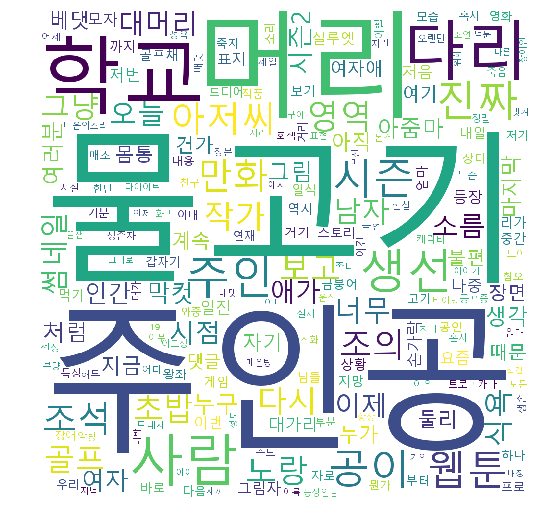

['ㅋ아 다리아픈애 솔직히 주인공인줄 알았는데 인트로에서 그냥 감? 개뜬금',
 '아...',
 '아줌마 무섭다..',
 '조석 작가님이 맞다. 생선 먹으면 머리가 좋아지는게 아니라 치매가 온다. 수은 오염 때문에',
 '이웹툰덕분에비위가더욱더강해졌다',
 '내생각엔 조석이 생선요리나 회 싫어해서다른사람들도 못먹게하려고 이거그리는듯',
 '와 진짜개꿀잼이다 요즘웹툰호랑이형님빼곤 다노잼인데 이건개꿀잼이네',
 '아 진짜 더러워서 못보겧다',
 '죽었으니까 표지에 있는 사람으로 시점변환한 거 아닐까요',
 '죽은거 아닐수도 있어',
 '시작컷 ㅈㄴ무섭네....',
 '⬇ㅇㅈ비행기 타면 공항까진 갈수있고? 길 다막혔는데?배는 불가능인데 뭐타고 갈려고',
 '몽골 어떻게 갈건데 ㅋㅋ? 헤엄쳐서?',
 '아니 몽골로 가면 되잖아 4방이 다 육지니까 거기가 제일 안전하겠네',
 'ㅇㅂㅎ아 니 몰겜하고있지',
 '노랭머리 잴오랫동안생존해있네',
 '물고기 진짜 개무섭게 그린다',
 '다리아픈 애 살았을것 같애요. 저 아줌마가 칼로 머리를 찌른것처럼 실루엣이 나오는데 칼 저렇게 집고. 사람머리 저렇게 못꽂습니다. 칼날이 위로 향하게 찍었다면.. 죽었을텐데. 아래로 향했다면. 칼이 빗나갔을 가능성 높아요.',
 '금붕어 공포증 생기겠네 ㅅㅂ',
 '누가 주인공이야 ㅡㅡ',
 '야 막컷에 노랑머리 그 고등학생아니냐?',
 '시즌1때 여자가 바로 죽은것도 그렇고 주인공이라는게 아예 없는듯',
 '최소 왕좌의 게임이네.. 주인공이 누구야 대체',
 '썸네일에 있는 애가 저 골프치는애 아님?',
 '조석은 맨날 2등이내 ㅋㅋ',
 '1부 주인공은 검은 머리 많이자랐었는데.?',
 '조석님 물고기가ㅠ너무 무서워요',
 '골프채 든애 완전 단순해ㅋㅋ개귀엽다',
 '엇? 먹히고 뒤로 다시 나올줄 알았는데 못나오네 풉',
 '노랑색머리 젼주인공아닌가??',
 '이거조고 생선 싫어졌다 좋아요 눌러라',
 '44비',
 '저거 죽은게 아니라 손보니 간발의 차로 목 찌른듯',
 '물고기 병은이 

In [4]:
get_comment()